In [102]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd
from PIL import Image
import seaborn as sns 
import matplotlib.pyplot as plt
import tensorflow_hub as hub


import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from keras.layers import Input, Activation, LeakyReLU, Dropout
from keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [103]:
MAIN_DIR = 'C:/Users/junda/OneDrive/Bureau/PROJET_ IMAGERIE/Medical_Imaging/brain-mri-images-for-brain-tumor-detection'
SEED = 40

In [104]:
os.listdir(MAIN_DIR)

['no', 'yes']

In [105]:
subdirs = os.listdir(MAIN_DIR)[:2]
for subdir in subdirs:
    print(f"{subdir} contains {len(os.listdir(MAIN_DIR+'/'+subdir))} images")

no contains 98 images
yes contains 155 images


In [106]:
def load_images(folder):
    
    imgs = []
    target = 0
    labels = []
    for i in os.listdir(folder):
        subdir = os.path.join(folder, i)
        for j in os.listdir(subdir):
            img_dir = os.path.join(subdir,j)
            try:
                img = cv2.imread(img_dir)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img = cv2.resize(img, (128,128))
                imgs.append(img)
                labels.append(target)
            except:
                continue
        target += 1
    
    imgs = np.array(imgs)
    labels = np.array(labels)
    
    return imgs, labels

In [107]:
data, labels = load_images(MAIN_DIR)
data.shape, labels.shape

((253, 128, 128), (253,))

In [108]:
def plot_images(start, end):
    plt.figure(figsize=(22,8))
    for i in range(10):
        axs = plt.subplot(2,5, i+1)
        idx = np.random.randint(start, end)
        plt.imshow(data[idx], cmap='gray')
        plt.axis('on')
        axs.set_xticklabels([])
        axs.set_yticklabels([])
        plt.subplots_adjust(wspace=None, hspace=None)

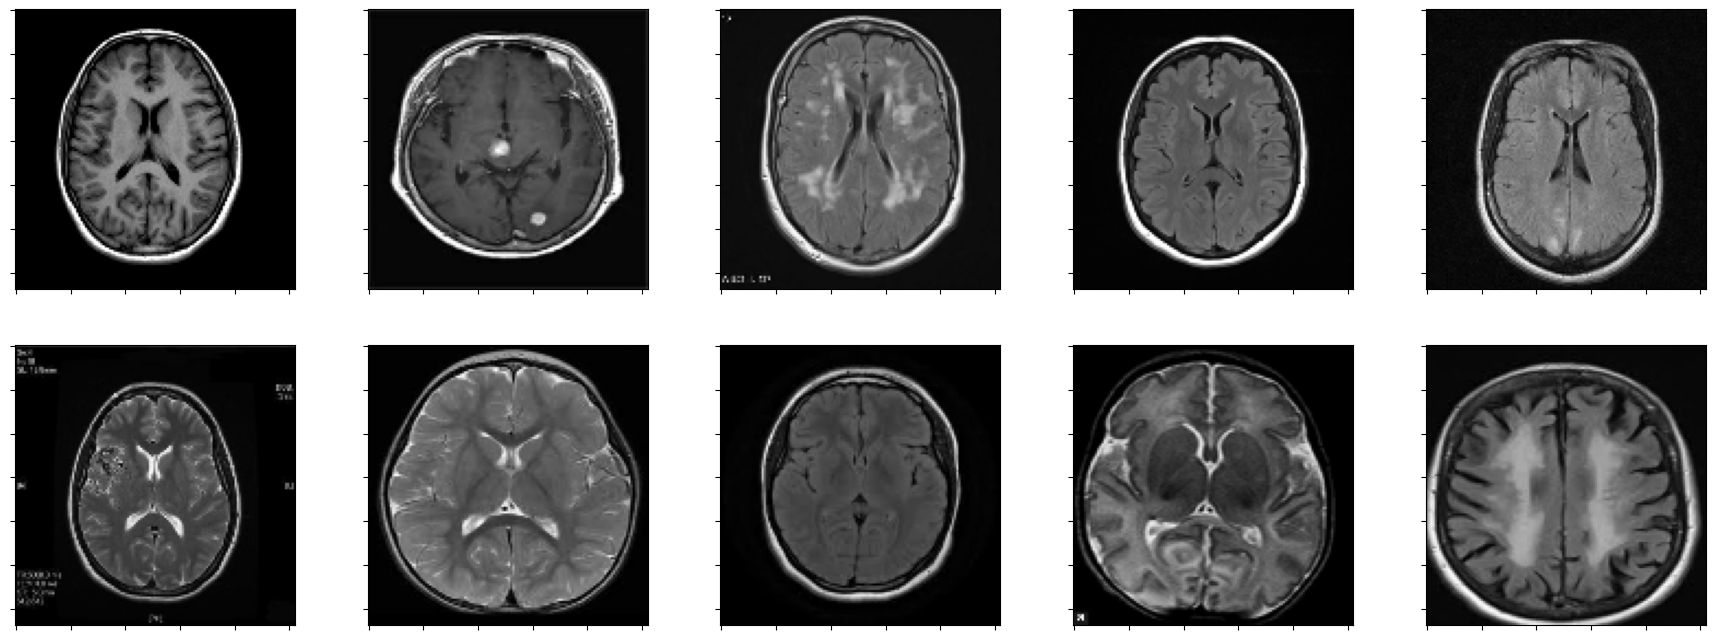

In [109]:
plot_images(0, 97) # 0 to 97 for images with no tumor

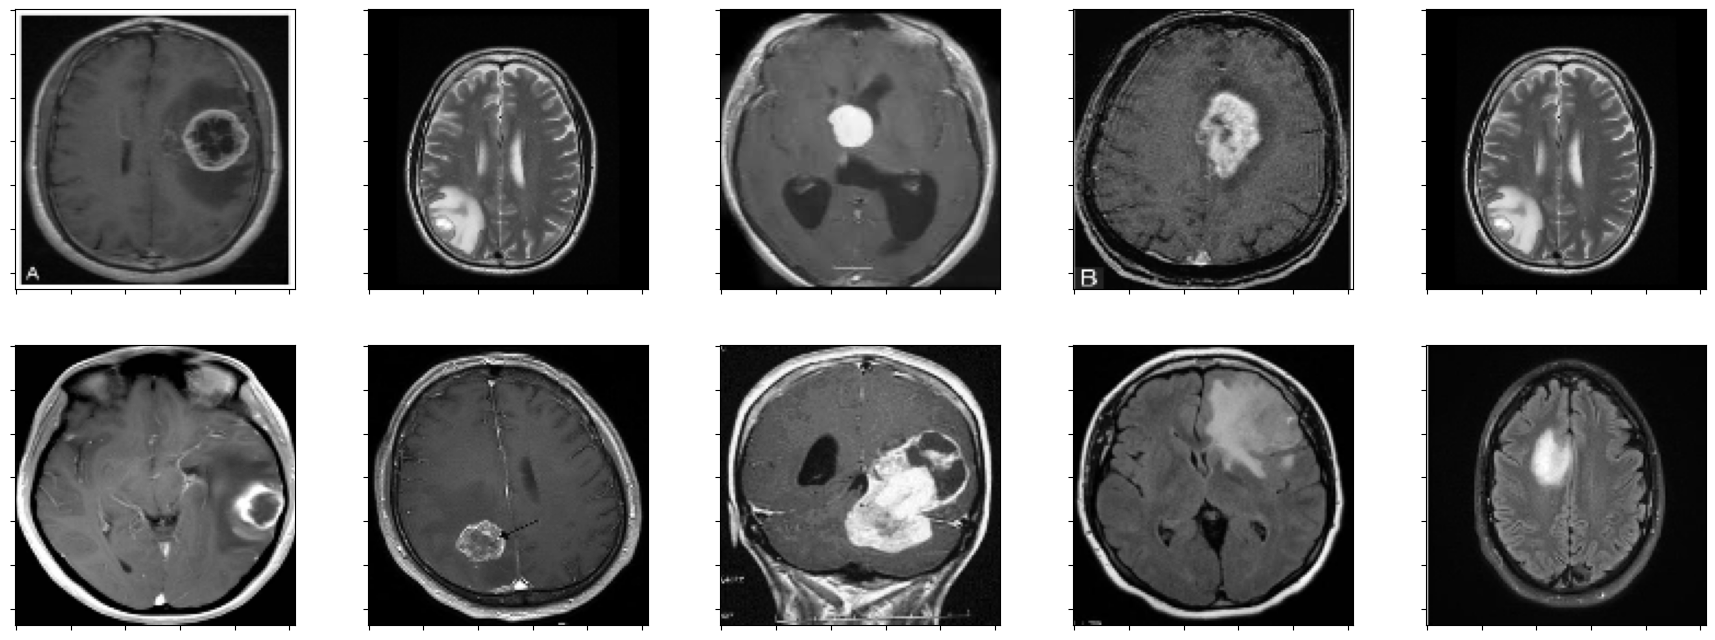

In [110]:
plot_images(98, 252) # 98 to 252 for images with tumor 

In [111]:
norm_data = data / 255. 
norm_data = np.expand_dims(norm_data, axis=3)
norm_data.shape, norm_data[0]

((253, 128, 128, 1),
 array([[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        ...,
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]]))

In [112]:
IMG_SHAPE = (128,128)
BATCH_SIZE = 32
datagen = ImageDataGenerator(rescale=1/255.,
                             validation_split=0.5)
train_data = datagen.flow_from_directory(MAIN_DIR,
                                        target_size=IMG_SHAPE,
                                        batch_size=BATCH_SIZE,
                                        class_mode="binary",
                                        shuffle=True,
                                        subset="training")
test_data = datagen.flow_from_directory(MAIN_DIR,
                                       target_size=IMG_SHAPE,
                                       batch_size=BATCH_SIZE,
                                       class_mode="binary",
                                       shuffle=True,
                                       subset="validation")

Found 127 images belonging to 2 classes.
Found 126 images belonging to 2 classes.


In [113]:
tf.random.set_seed(SEED)

model = Sequential([
    Conv2D(filters=64,
           kernel_size=3,
           activation='relu'),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(32,3,activation='relu'),
    Conv2D(16,3,activation='relu'),
    MaxPool2D(2, padding='same'),
    Flatten(),
    Dense(1, activation='sigmoid')
])
# Compile the model
model.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(),
              metrics=["accuracy"])

# Fit the model
history = model.fit(train_data,
                    epochs=10,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/10
4/4 [==============================] - 6s 1s/step - loss: 0.6631 - accuracy: 0.6299 - val_loss: 0.6024 - val_accuracy: 0.6111
Epoch 2/10
4/4 [==============================] - 4s 1s/step - loss: 0.5953 - accuracy: 0.6693 - val_loss: 0.5387 - val_accuracy: 0.8016
Epoch 3/10
4/4 [==============================] - 4s 1s/step - loss: 0.5319 - accuracy: 0.7638 - val_loss: 0.5174 - val_accuracy: 0.7460
Epoch 4/10
4/4 [==============================] - 5s 1s/step - loss: 0.5366 - accuracy: 0.7559 - val_loss: 0.5126 - val_accuracy: 0.7937
Epoch 5/10
4/4 [==============================] - 5s 1s/step - loss: 0.4818 - accuracy: 0.8031 - val_loss: 0.5134 - val_accuracy: 0.7778
Epoch 6/10
4/4 [==============================] - 4s 1s/step - loss: 0.4923 - accuracy: 0.8031 - val_loss: 0.5049 - val_accuracy: 0.7937
Epoch 7/10
4/4 [==============================] - 4s 1s/step - loss: 0.4357 - accuracy: 0.8346 - val_loss: 0.5034 - val_accuracy: 0.7698
Epoch 8/10
4/4 [=========================

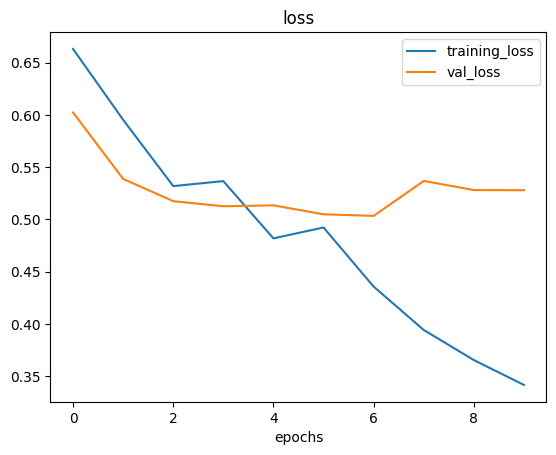

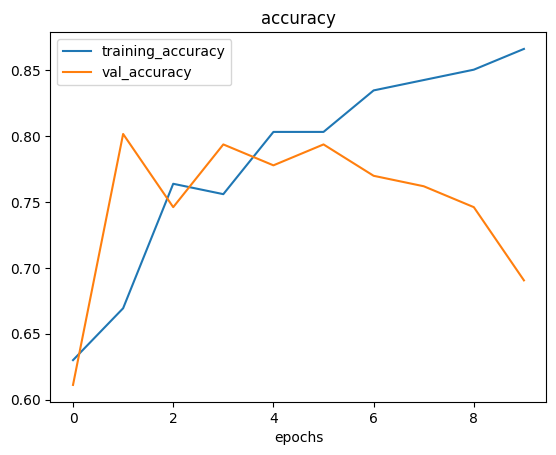

In [114]:
def plot_curves(history):

    """
    Returns separate loss and accuracy curves
    """
    import matplotlib.pyplot as plt

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()
plot_curves(history)

In [115]:
# EfficientNetB0 Feature Vector
effnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

# Feature Layer
effnet_layer = hub.KerasLayer(effnet_url,
                              trainable=False,
                              name="feature_extraction_layer")
# Create Sequential model
effnet_model = Sequential([
    effnet_layer,
    Dense(1, activation="sigmoid")
])

# Compile the model
effnet_model.compile(loss=BinaryCrossentropy(),
                     optimizer=Adam(),
                     metrics=["accuracy"])

# Fit the model
effnet_history = effnet_model.fit(train_data,
                                  epochs=10,
                                  steps_per_epoch=len(train_data), validation_data=test_data,
                                  validation_steps=len(test_data))

Epoch 1/10
4/4 [==============================] - 12s 1s/step - loss: 0.6470 - accuracy: 0.5906 - val_loss: 0.6001 - val_accuracy: 0.7222
Epoch 2/10
4/4 [==============================] - 2s 689ms/step - loss: 0.5854 - accuracy: 0.6693 - val_loss: 0.5588 - val_accuracy: 0.7460
Epoch 3/10
4/4 [==============================] - 2s 678ms/step - loss: 0.5405 - accuracy: 0.7165 - val_loss: 0.5236 - val_accuracy: 0.7937
Epoch 4/10
4/4 [==============================] - 2s 672ms/step - loss: 0.4990 - accuracy: 0.7795 - val_loss: 0.4975 - val_accuracy: 0.7937
Epoch 5/10
4/4 [==============================] - 3s 730ms/step - loss: 0.4682 - accuracy: 0.8661 - val_loss: 0.4761 - val_accuracy: 0.8254
Epoch 6/10
4/4 [==============================] - 2s 689ms/step - loss: 0.4410 - accuracy: 0.8819 - val_loss: 0.4532 - val_accuracy: 0.8254
Epoch 7/10
4/4 [==============================] - 2s 692ms/step - loss: 0.4169 - accuracy: 0.8819 - val_loss: 0.4338 - val_accuracy: 0.8333
Epoch 8/10
4/4 [======

In [116]:
result = model.evaluate(test_data, verbose=0)
print(f"Accuracy on Evaluation: {result[1]*100:.2f}%\nLoss: {result[0]:.4f}")

Accuracy on Evaluation: 69.05%
Loss: 0.5279


In [117]:
result = effnet_model.evaluate(test_data, verbose=0)
print(f"Accuracy on Evaluation: {result[1]*100:.2f}%\nLoss: {result[0]:.4f}")

Accuracy on Evaluation: 87.30%
Loss: 0.3969
